### Target:
    
    - Getting a working modular setup. We will use assignment 5 code.

    - Model.py has models and utils.py has train, test and plotting functions.

### Results:

    - Model has 5.9M parameters.

    - Train Accuracy = 99.95

    - Test Accuracy = 99.35

### Analysis:

    - Our setup is running correctly.

    - Model is very large and overfitting

    - Closer look at images tell us that a receptive field of 5 pixels is enough to catch edges.

In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [4]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [7]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


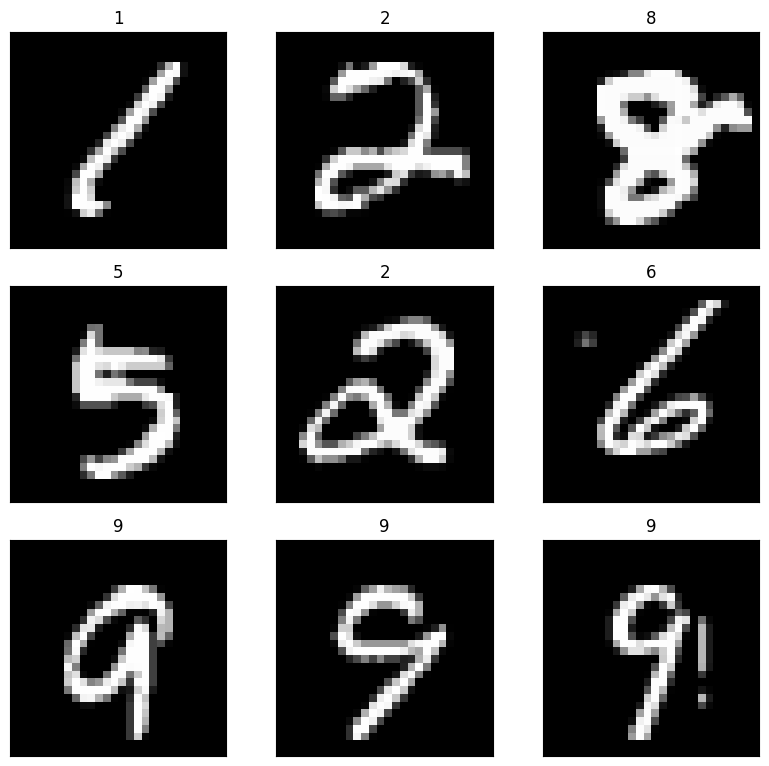

In [9]:
from utils import show_examples
show_examples(train_loader, figsize=(8, 8))

In [11]:
from model import Model1 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model1                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Conv2d: 1-1                            [32, 1, 28, 28]           [32, 32, 26, 26]          320                         0.05%
├─Conv2d: 1-2                            [32, 32, 26, 26]          [32, 64, 24, 24]          18,496                      3.12%
├─Conv2d: 1-3                            [32, 64, 12, 12]          [32, 128, 10, 10]         73,856                     12.45%
├─Conv2d: 1-4                            [32, 128, 10, 10]         [32, 256, 8, 8]           295,168                    49.76%
├─Linear: 1-5                            [32, 4096]                [32, 50]                  204,850                    34.53%
├─Linear: 1-6                            [32, 50]                  [32, 10]                  510               

In [12]:
from utils import train, test

In [13]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0295 Batch_id=1874 Average Loss=0.1720 Accuracy=94.41: 100%|██████████| 1875/1875 [00:39<00:00, 47.82it/s]


Test set: Average loss: 0.0468, Accuracy: 9868/10000 (98.68%)

Epoch 2


Train: Batch Loss=0.1166 Batch_id=1874 Average Loss=0.0397 Accuracy=98.79: 100%|██████████| 1875/1875 [00:29<00:00, 63.38it/s]


Test set: Average loss: 0.0399, Accuracy: 9881/10000 (98.81%)

Epoch 3


Train: Batch Loss=0.0204 Batch_id=1874 Average Loss=0.0279 Accuracy=99.13: 100%|██████████| 1875/1875 [00:29<00:00, 63.06it/s]


Test set: Average loss: 0.0242, Accuracy: 9919/10000 (99.19%)

Epoch 4


Train: Batch Loss=0.0034 Batch_id=1874 Average Loss=0.0191 Accuracy=99.40: 100%|██████████| 1875/1875 [00:30<00:00, 62.04it/s]


Test set: Average loss: 0.0281, Accuracy: 9903/10000 (99.03%)

Epoch 5


Train: Batch Loss=0.0004 Batch_id=1874 Average Loss=0.0135 Accuracy=99.59: 100%|██████████| 1875/1875 [00:31<00:00, 58.95it/s]


Test set: Average loss: 0.0254, Accuracy: 9927/10000 (99.27%)

Epoch 6


Train: Batch Loss=0.0002 Batch_id=1874 Average Loss=0.0115 Accuracy=99.65: 100%|██████████| 1875/1875 [00:30<00:00, 61.35it/s]


Test set: Average loss: 0.0234, Accuracy: 9923/10000 (99.23%)

Epoch 7


Train: Batch Loss=0.0026 Batch_id=1874 Average Loss=0.0082 Accuracy=99.73: 100%|██████████| 1875/1875 [00:30<00:00, 62.43it/s]


Test set: Average loss: 0.0263, Accuracy: 9913/10000 (99.13%)

Epoch 8


Train: Batch Loss=0.0008 Batch_id=1874 Average Loss=0.0062 Accuracy=99.81: 100%|██████████| 1875/1875 [00:29<00:00, 64.24it/s]


Test set: Average loss: 0.0310, Accuracy: 9916/10000 (99.16%)

Epoch 9


Train: Batch Loss=0.0015 Batch_id=1874 Average Loss=0.0062 Accuracy=99.80: 100%|██████████| 1875/1875 [00:28<00:00, 66.67it/s]


Test set: Average loss: 0.0239, Accuracy: 9929/10000 (99.29%)

Epoch 10


Train: Batch Loss=0.0100 Batch_id=1874 Average Loss=0.0051 Accuracy=99.84: 100%|██████████| 1875/1875 [00:28<00:00, 66.04it/s]


Test set: Average loss: 0.0267, Accuracy: 9929/10000 (99.29%)

Epoch 11


Train: Batch Loss=0.0003 Batch_id=1874 Average Loss=0.0032 Accuracy=99.89: 100%|██████████| 1875/1875 [00:28<00:00, 65.67it/s]


Test set: Average loss: 0.0294, Accuracy: 9929/10000 (99.29%)

Epoch 12


Train: Batch Loss=0.0017 Batch_id=1874 Average Loss=0.0019 Accuracy=99.95: 100%|██████████| 1875/1875 [00:29<00:00, 64.28it/s]


Test set: Average loss: 0.0290, Accuracy: 9925/10000 (99.25%)

Epoch 13


Train: Batch Loss=0.0001 Batch_id=1874 Average Loss=0.0026 Accuracy=99.91: 100%|██████████| 1875/1875 [00:28<00:00, 64.87it/s]


Test set: Average loss: 0.0313, Accuracy: 9932/10000 (99.32%)

Epoch 14


Train: Batch Loss=0.0000 Batch_id=1874 Average Loss=0.0020 Accuracy=99.94: 100%|██████████| 1875/1875 [00:28<00:00, 64.93it/s]


Test set: Average loss: 0.0284, Accuracy: 9934/10000 (99.34%)

Epoch 15


Train: Batch Loss=0.0000 Batch_id=1874 Average Loss=0.0033 Accuracy=99.90: 100%|██████████| 1875/1875 [00:30<00:00, 61.24it/s]


Test set: Average loss: 0.0260, Accuracy: 9935/10000 (99.35%)



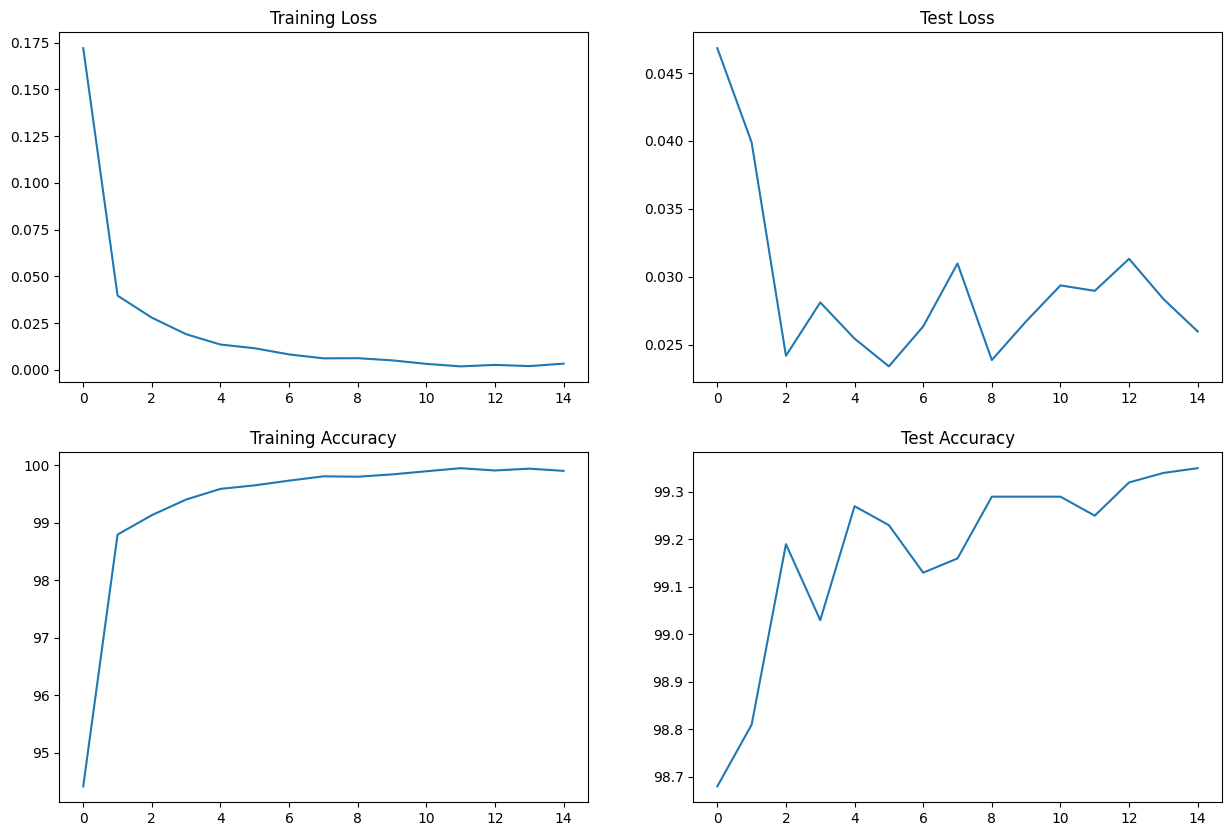

In [14]:
from utils import plot_stats
plot_stats()

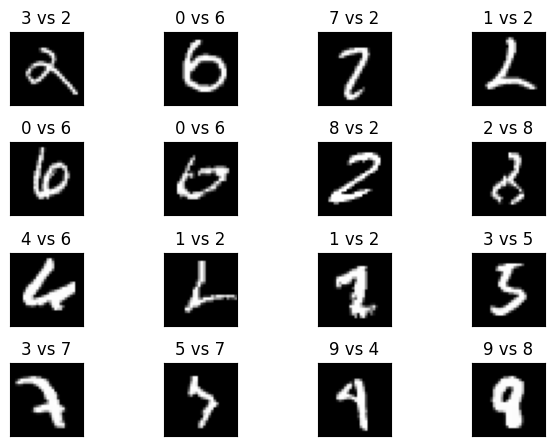

In [15]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual